In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('daily-total-female-births.csv')
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [3]:
df.tail()

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [5]:
df.shape


(365, 2)

In [6]:
df.columns

Index(['Date', 'Births'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


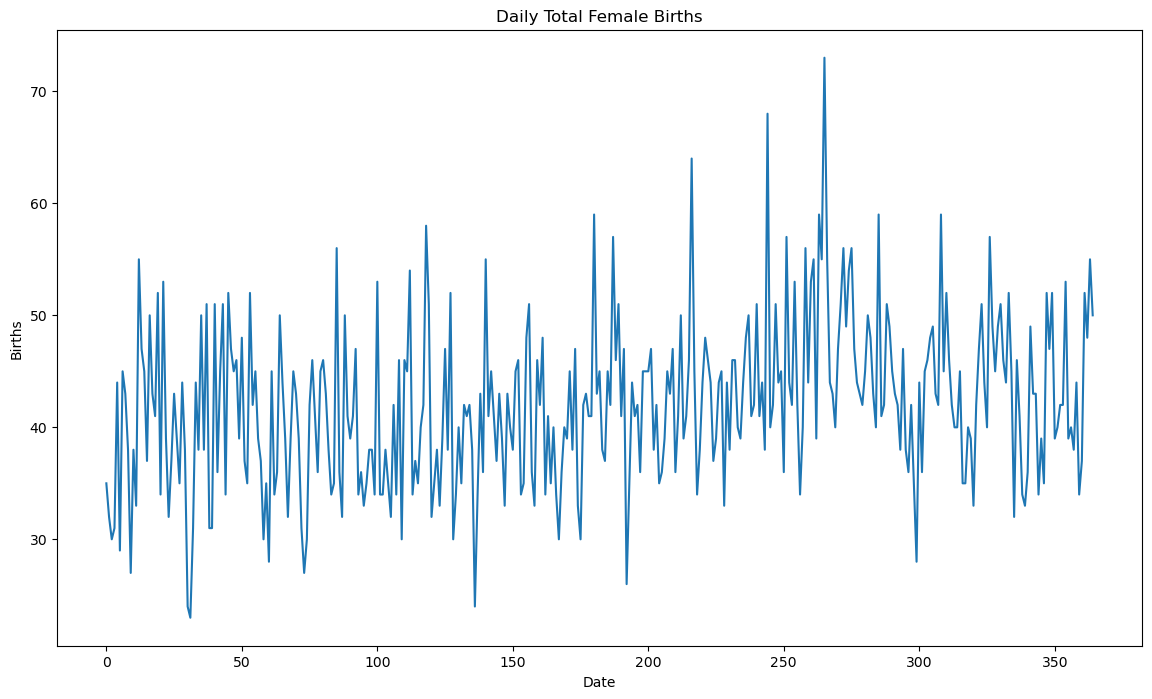

In [10]:
df.plot(title='Daily Total Female Births',figsize=(14,8),legend=None)
plt.xlabel('Date')
plt.ylabel('Births')
plt.show()

In [11]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
    statistic,p_value,n_lags,critical_values=kpss(series)
    print(f'KPSS Statistic:{statistic:.4f}')
    print(f'P-Value:{p_value:.4f}')
    print(f'Number of Lags:{n_lags}')
    print('Critical Values:')
    for key,value in critical_values.items():
        print(f'{key}{value:.4f}')
    print(f'Result:The series is{"not" if p_value<0.05 else""}stationary')
kpss_test(df['Births'])


KPSS Statistic:1.6130
P-Value:0.0100
Number of Lags:7
Critical Values:
10%0.3470
5%0.4630
2.5%0.5740
1%0.7390
Result:The series isnotstationary


C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\1127014033.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic,p_value,n_lags,critical_values=kpss(series)


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df['Births'],model='additive',period=132)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

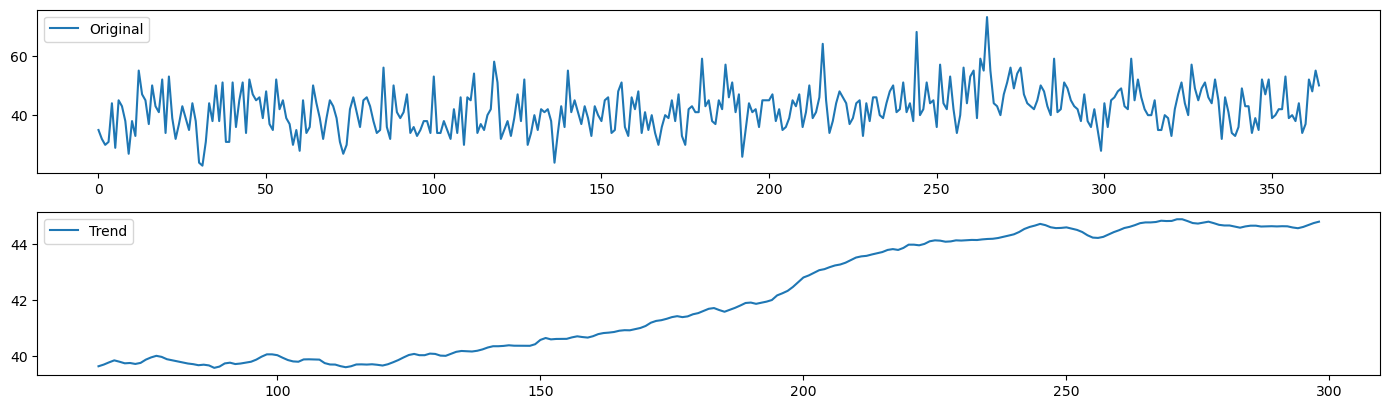

In [17]:
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(df['Births'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

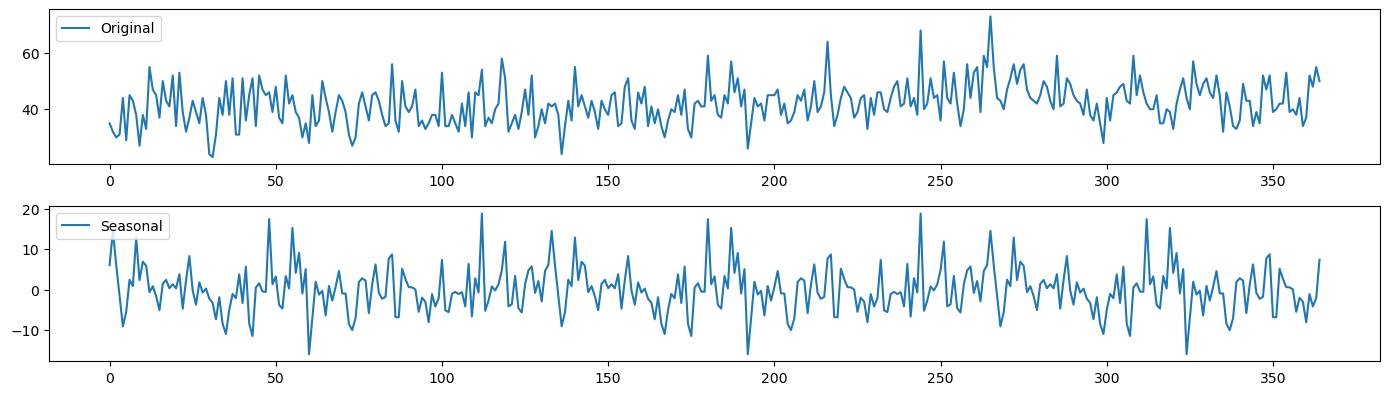

In [18]:
plt.figure(figsize=(14, 8))
plt.subplot(413)
plt.plot(df['Births'], label='Original')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

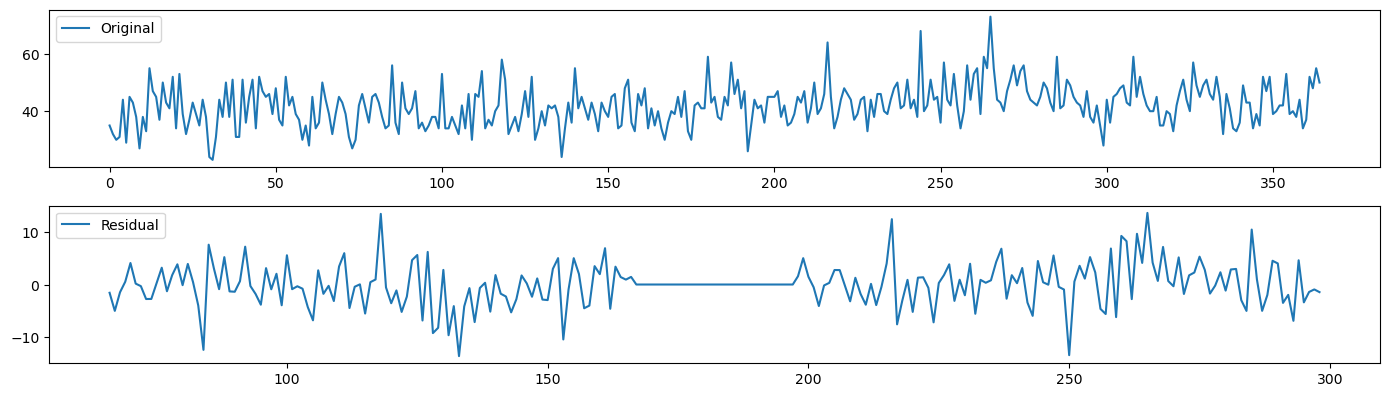

In [19]:
plt.figure(figsize=(14, 8))
plt.subplot(413)
plt.plot(df['Births'], label='Original')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()